# 自定义数据集加载

## 查看数据

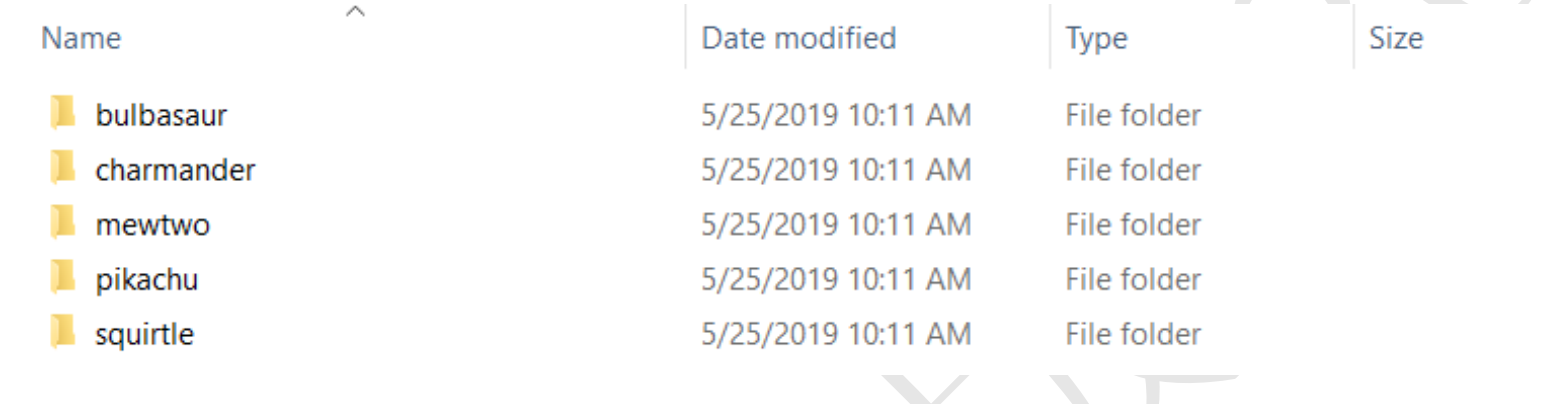

## 创建编码表


针对精灵宝可梦数据集的存储格式，我们通过如下方式创建编码表。首先按序遍历
pokemon 根目录下的所有子目录，对每个子目标，利用类别名作为编码表字典对象
name2label 的键，编码表的现有键值对数量作为类别的标签映射数字，并保存进
name2label 字典对象。

## 创建样本和标签表格


编码表确定后，我们需要根据实际数据的存储方式获得每个样本的存储路径以及它的
标签数字，分别表示为 images 和 labels 两个 List 对象。其中 images List 存储了每个样本的
路径字符串，labels List 存储了样本的类别数字，两者长度一致，且对应位置的元素相互关
联。


我们将 images 和 labels 信息存储在 csv 格式的文件中，其中 csv 文件格式是一种以逗
号符号分隔数据的纯文本文件格式，可以使用记事本或者 Excel 软件打开。通过将所有
样本信息存储在一个 csv 文件中有诸多好处，比如可以直接进行数据集的划分，可以随机
采样 Batch 等。csv 文件中可以保存数据集所有样本的信息，也可以根据训练集、验证集和
测试集分别创建 3 个 csv 文件。最终产生的 csv 文件内容如下图所示，每行的第一个元
素保存了当前样本的存储路径，第二个元素保存了样本的类别数字。

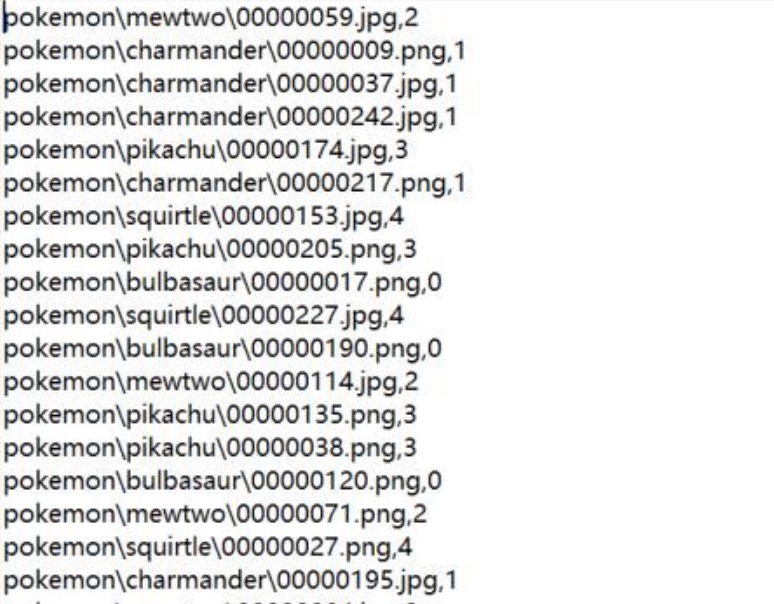

##  数据集划分

数据集的划分需要根据实际情况来灵活调整划分比率。当数据集样本数较多时，可以
选择 80%-10%-10%的比例分配给训练集、验证集和测试集；当样本数量较少时，如这里的
宝可梦数据集图片总数仅 1000 张左右，如果验证集和测试集比例只有 10%，则其图片数量约为 100 张，因此验证准确率和测试准确率可能波动较大。对于小型的数据集，尽管样
本数量较小，但还是需要适当增加验证集和测试集的比例，以保证获得准确的测试结果。
这里我们将验证集和测试集比例均设置为 20%，即有约 200 张图片用作验证和测试。

## 代码构建

In [1]:
import tensorflow as tf 
import glob
import os
import random, csv
from tensorflow import keras
from tensorflow.keras import layers, optimizers, losses
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys

In [3]:
print(sys.version)
print(tf.__version__)
for module in  mpl, csv:
    print(module.__name__, module.__version__)

3.9.9 (v3.9.9:ccb0e6a345, Nov 15 2021, 13:29:20) 
[Clang 6.0 (clang-600.0.57)]
2.8.0
matplotlib 3.5.1
csv 1.0


In [4]:
# 数据集存放路径
base_data_path = "../data/pokemon/pokemon"

In [5]:
# 加载csv文件，创建样本和标签表格

def load_csv(root, filename, name2label):
    # 从csv文件返回images,labels列表
    # root:数据集根目录，filename:csv文件名， name2label:类别名编码表
    if not os.path.exists(os.path.join(root, filename)):
        # 如果csv文件不存在，则创建
        images = []
        
        # todo
        # 遍历所有子目录，获得所有的图片
        # 只考虑后缀为png,jpg,jpeg的图片：'pokemon\\mewtwo\\00001.png
            
 
        # todo 随机打散顺序
 
        # todo 创建csv文件，并存储图片路径及其label信息
        
 
    # todo 此时已经有csv文件，直接读取
    images, labels = [], []
 
    # 返回图片路径list和标签list
    return images, labels

In [6]:
# 创建编码表
# 数据集划分

def load_pokemon(root, mode='train'):
 
    # 创建数字编码表
    name2label = {}  # "sq...":0
 
    # 遍历根目录下的子文件夹，并排序，保证映射关系固定
    for name in sorted(os.listdir(os.path.join(root))):
        # 跳过非文件夹
        if not os.path.isdir(os.path.join(root, name)):
            continue
 
        # 给每个类别编码一个数字
        name2label[name] = len(name2label.keys())
 
    # 读取Label信息
    # [file1,file2,], [3,1]
    images, labels = load_csv(root, 'images.csv', name2label)
 
    if mode == 'train':  # 60%
        images = images[:int(0.6 * len(images))]
        labels = labels[:int(0.6 * len(labels))]
 
    elif mode == 'val':  # 20% = 60%->80%
        # todo
        pass
 
    else:  # 20% = 80%->100%
        # todo
        pass
 
    return images, labels, name2label

## 展示数据集内容

In [8]:
images, labels, table = load_pokemon(base_data_path, 'train')
print(images[:5])

['/Users/luzhiyuan/Desktop/blg_2022_lectures/lesson_02/data/pokemon/pokemon/mewtwo/00000101.jpg', '/Users/luzhiyuan/Desktop/blg_2022_lectures/lesson_02/data/pokemon/pokemon/mewtwo/00000007.jpg', '/Users/luzhiyuan/Desktop/blg_2022_lectures/lesson_02/data/pokemon/pokemon/bulbasaur/00000143.jpg', '/Users/luzhiyuan/Desktop/blg_2022_lectures/lesson_02/data/pokemon/pokemon/mewtwo/00000152.png', '/Users/luzhiyuan/Desktop/blg_2022_lectures/lesson_02/data/pokemon/pokemon/pikachu/00000007.jpg']


In [9]:
def plt_mutli_images(images_path, figsize=5, images_num=9, row_images_num=3):
    plt.figure(figsize=(figsize, figsize))
    for i in range(images_num):
        ax = plt.subplot(row_images_num, row_images_num, i + 1)
        image_data = tf.image.decode_jpeg(tf.io.read_file(images_path[i]), channels=3)
        plt.grid(False)
        plt.imshow(image_data)
        title = images_path[i].split('/')[-2]
        plt.title(title)
        # plt.xlabel(title)
        plt.axis("off")
    plt.show()

2022-03-08 10:36:42.603911: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: too many profiles


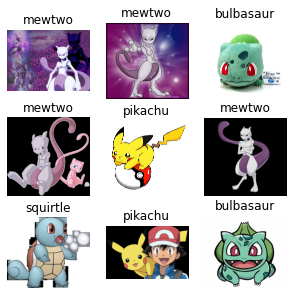

In [15]:
plt_mutli_images(images[:9])

In [13]:
def plt_single_image(image_path):
    image_data = tf.image.decode_jpeg(tf.io.read_file(image_path), channels=3)
    title = image_path.split('/')[-2]
    plt.imshow(image_data)
    plt.title(title)
    plt.show()

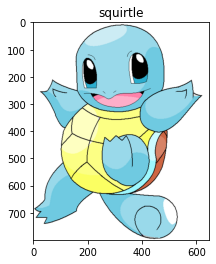

In [14]:
plt_single_image(images[9])